In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

### Importing data from csv

In [2]:
dfa = pd.read_csv('dftRoadSafetyData_Accidents_2018.csv', index_col='Accident_Index')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dfc = pd.read_csv('dftRoadSafetyData_Casualties_2018.csv', index_col='Accident_Index')

In [4]:
dfa.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,2,...,0,0,4,1,1,0,0,1,1,E01000854
2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,2,...,0,0,4,1,1,0,0,1,1,E01003531
2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,2,...,0,5,4,1,1,0,0,1,1,E01002723
2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,2,...,0,5,4,2,2,0,0,1,1,E01003492
2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,2,...,0,0,4,1,2,0,0,1,1,E01001682


In [5]:
dfc.head()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
Accident_Index,,,,,,,,,,,,,,,
2018010080971,1,1,2,2,50,8,3,0,0,2,0,0,9,1,8
2018010080971,2,2,1,1,48,8,3,0,0,0,0,0,8,1,1
2018010080973,1,1,3,1,29,6,3,5,1,0,0,2,0,1,3
2018010080974,1,1,1,1,40,7,3,0,0,0,0,0,8,1,3
2018010080981,1,1,1,1,27,6,2,0,0,0,0,0,9,1,7


In [6]:
print(dfa.shape)
print(dfc.shape)

(122635, 31)
(160597, 15)


### Joining two datasets by Accidents ID

In [7]:
#dfjo = dfa.join(dfc, how='inner')
df = dfa.join(dfc, on='Accident_Index')

### Checking for missing data

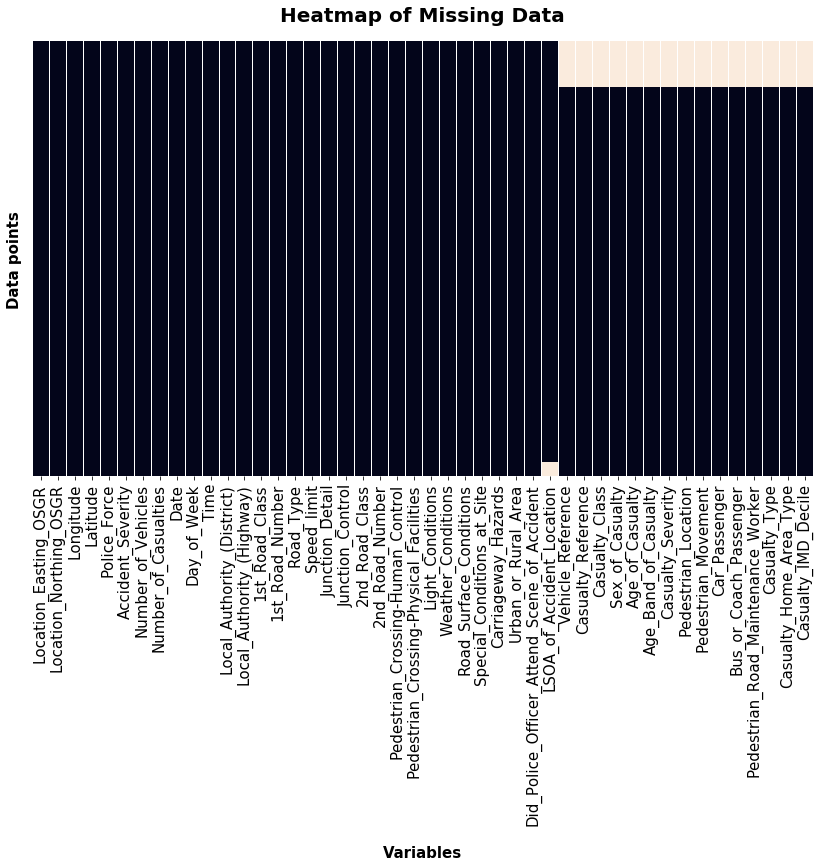

In [8]:
#graphically see the missing data

fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.heatmap(df.isna(), cbar=False)
plt.xlabel('Variables', fontsize=15, labelpad=20, fontweight='bold')
plt.ylabel('Data points',  labelpad=10, fontsize=15, fontweight='bold')
plt.title('Heatmap of Missing Data', pad=20, fontsize=20, fontweight='bold')
plt.xticks(fontsize=15);
ax.yaxis.set_ticks(np.arange(0, 100, 100));
#fig.savefig('Heatmap.jpg', bbox_inches='tight')

In [9]:
df.shape

(157342, 46)

### Dropping missing values

In [10]:
df = df.dropna()

In [11]:
df.shape

(132500, 46)

### Merging two close categories (Serious and Fatal) into one and creating classification dummy for Severity of accident (Serious = 1, Slight = 0)

In [12]:
df['Severity_dummy'] = np.where(df['Accident_Severity']==3, 0, 1)

In [13]:
df.shape

(132500, 47)

In [14]:
df['Severity_dummy'].value_counts()

0    102837
1     29663
Name: Severity_dummy, dtype: int64

## Exploratory data analysis 

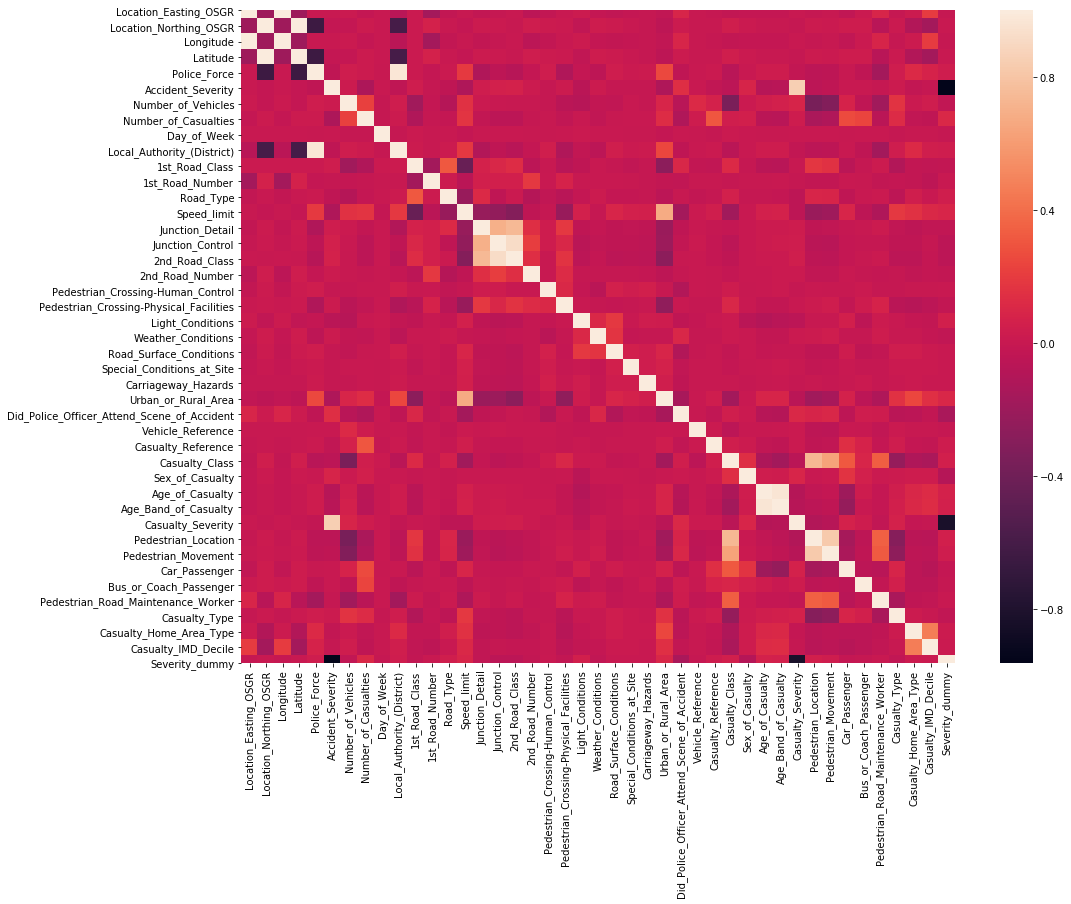

In [15]:
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(df.corr())#cbar=False)

Continuous Variables
                      count      mean       std  min  25%  50%  75%  max
Sex_of_Casualty    132500.0  1.411389  0.493466 -1.0  1.0  1.0  2.0  2.0
Accident_Severity  132500.0  2.757638  0.469687  1.0  3.0  3.0  3.0  3.0


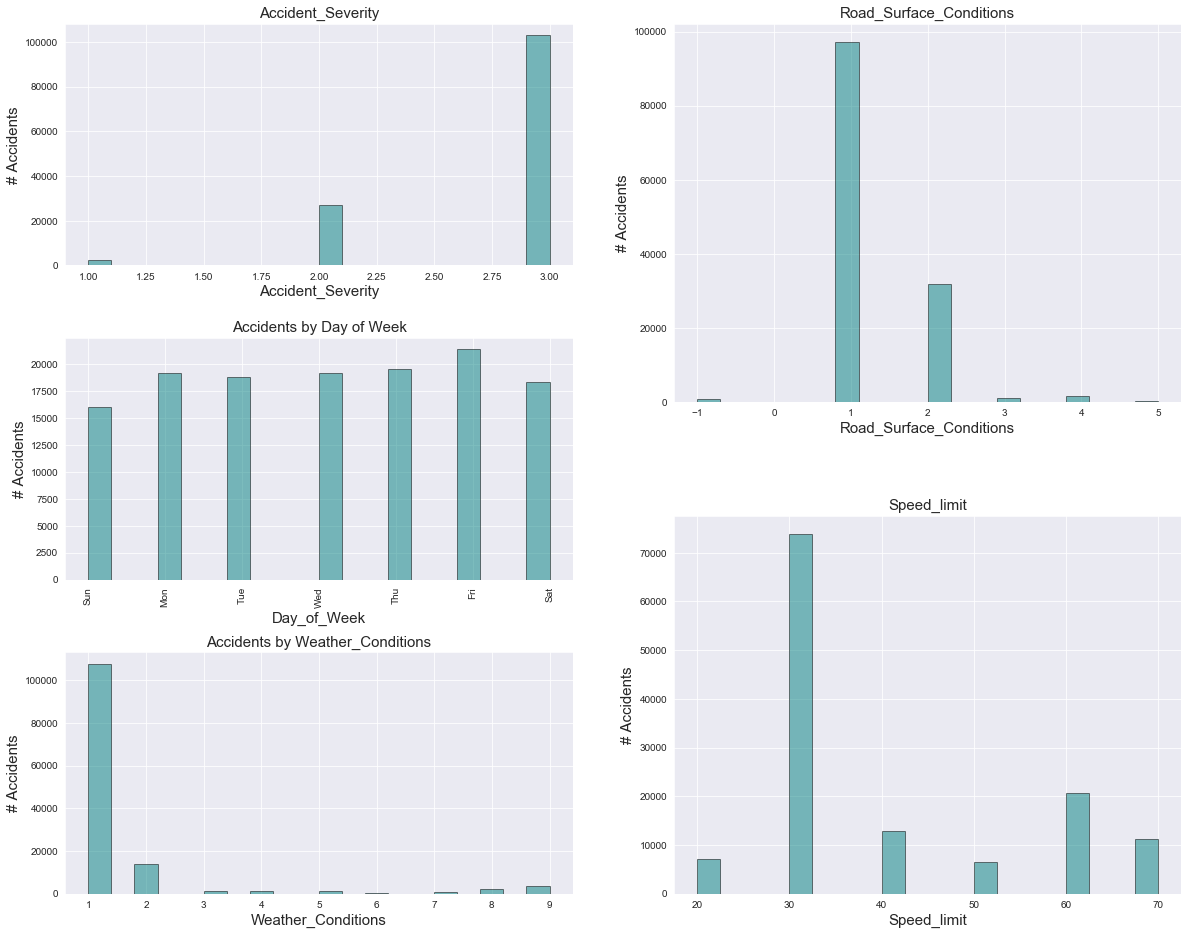

In [16]:
# Identify numeric features
print('Continuous Variables')
print(df[['Sex_of_Casualty','Accident_Severity']].describe().transpose())

# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(df['Accident_Severity'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Accident_Severity', labelpad=3, fontsize = 15)
#ax1.set_xticklabels(['Fatal', 'Serious', 'Slight'], rotation=90)
ax1.set_ylabel('# Accidents',fontsize = 15)
ax1.set_title('Accident_Severity',fontsize = 15)

ax2 = fig.add_subplot(323)
ax2.hist(df['Day_of_Week'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Day_of_Week',fontsize = 15)
ax2.set_xticklabels(['Sun', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], rotation=90)
ax2.set_ylabel('# Accidents',fontsize = 15)
ax2.set_title('Accidents by Day of Week',fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(df['Weather_Conditions'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Weather_Conditions',fontsize = 15)
ax3.set_ylabel('# Accidents',fontsize = 15)
ax3.set_title('Accidents by Weather_Conditions',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(df['Road_Surface_Conditions'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Road_Surface_Conditions',fontsize = 15)
ax4.set_ylabel('# Accidents',fontsize = 15)
ax4.set_title('Road_Surface_Conditions',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(df['Speed_limit'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Speed_limit',fontsize = 15)
ax5.set_ylabel('# Accidents',fontsize = 15)
ax5.set_title('Speed_limit',fontsize = 15)

plt.show()

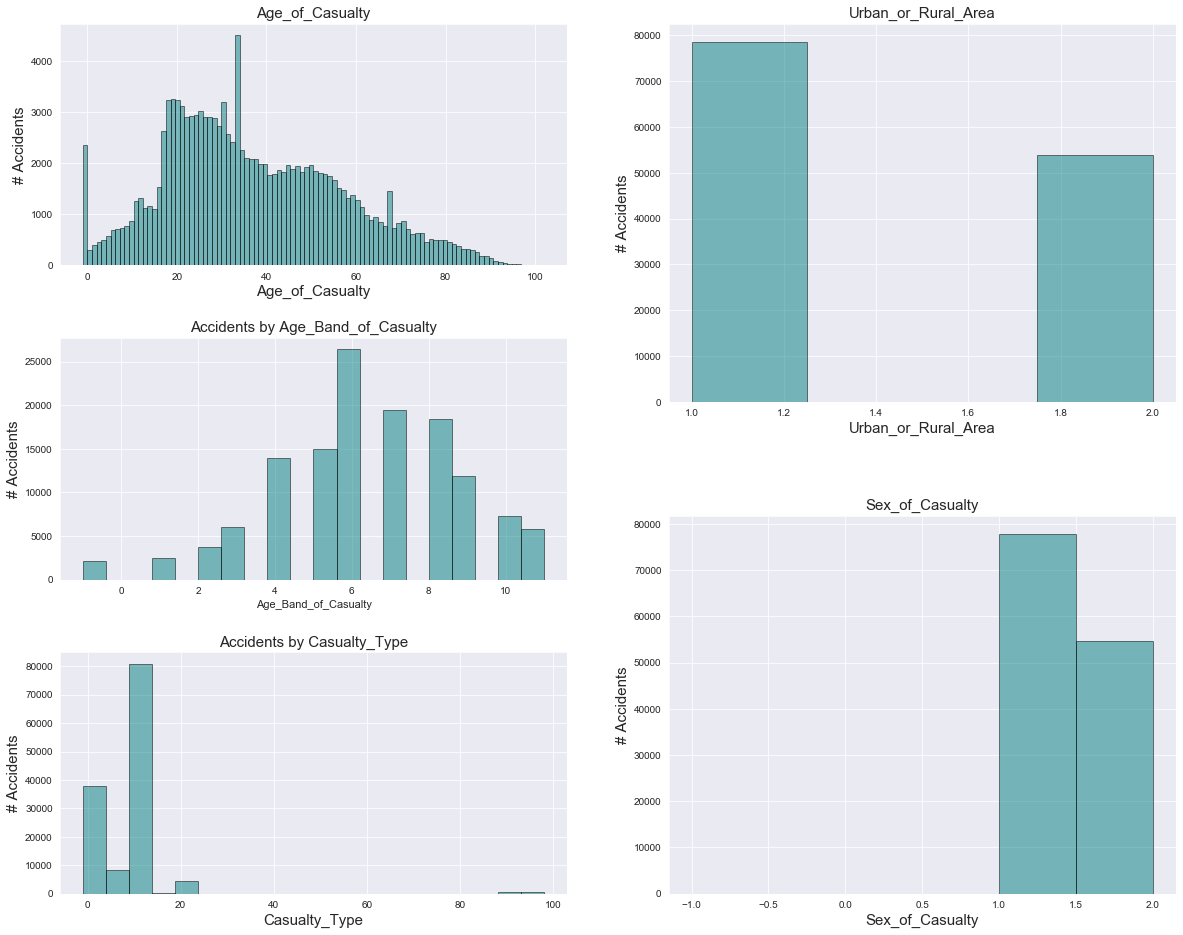

In [17]:
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(df['Age_of_Casualty'], bins = 100, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Age_of_Casualty', labelpad=3, fontsize = 15)
#ax1.set_xticklabels(['Fatal', 'Serious', 'Slight'], rotation=90)
ax1.set_ylabel('# Accidents',fontsize = 15)
ax1.set_title('Age_of_Casualty',fontsize = 15)

ax2 = fig.add_subplot(323)
ax2.hist(df['Age_Band_of_Casualty'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Age_Band_of_Casualty',fontsize = 11)
ax2.set_ylabel('# Accidents',fontsize = 15)
ax2.set_title('Accidents by Age_Band_of_Casualty',fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(df['Casualty_Type'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Casualty_Type',fontsize = 15)
ax3.set_ylabel('# Accidents',fontsize = 15)
ax3.set_title('Accidents by Casualty_Type',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(df['Urban_or_Rural_Area'], bins = 4, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Urban_or_Rural_Area',fontsize = 15)
ax4.set_ylabel('# Accidents',fontsize = 15)
ax4.set_title('Urban_or_Rural_Area',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(df['Sex_of_Casualty'], bins = 6, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Sex_of_Casualty',fontsize = 15)
ax5.set_ylabel('# Accidents',fontsize = 15)
ax5.set_title('Sex_of_Casualty',fontsize = 15)

plt.show()

In [18]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger

In [19]:
df['Age_Band_of_Casualty'].value_counts()

 6.0     26391
 7.0     19503
 8.0     18466
 5.0     14946
 4.0     13916
 9.0     11829
 10.0     7276
 3.0      5978
 11.0     5824
 2.0      3788
 1.0      2447
-1.0      2136
Name: Age_Band_of_Casualty, dtype: int64

In [20]:
(26391+14946)/102837

0.40196621838443364

#### Creating dataset with only Fatal accidents

In [40]:
df_fatal = df.loc[df['Accident_Severity'] == 1]
df_fatal

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Severity_dummy
Accident_Index,,,,,,,,,,,,,,,,,,,,,
2018010130813,539820.0,187850.0,0.016184,51.572189,1,1,2,2,06/09/2018,5,...,1.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0,1
2018010130813,539820.0,187850.0,0.016184,51.572189,1,1,2,2,06/09/2018,5,...,2.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,4.0,1
2018010131238,528950.0,184350.0,-0.141857,51.543326,1,1,1,1,07/09/2018,6,...,1.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,6.0,1
2018010131682,527290.0,200000.0,-0.160104,51.684345,1,1,2,4,10/09/2018,2,...,2.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,7.0,1
2018010131682,527290.0,200000.0,-0.160104,51.684345,1,1,2,4,10/09/2018,2,...,3.0,0.0,0.0,1.0,0.0,0.0,9.0,-1.0,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201863D001618,320640.0,240880.0,-3.158967,52.060598,63,1,3,3,03/09/2018,2,...,3.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,7.0,1
201863D001918,304120.0,320270.0,-3.422640,52.771494,63,1,1,1,23/09/2018,1,...,1.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,-1.0,1
201863D002518,313140.0,237610.0,-3.267505,52.030080,63,1,2,1,08/12/2018,7,...,1.0,0.0,0.0,0.0,0.0,0.0,9.0,2.0,-1.0,1


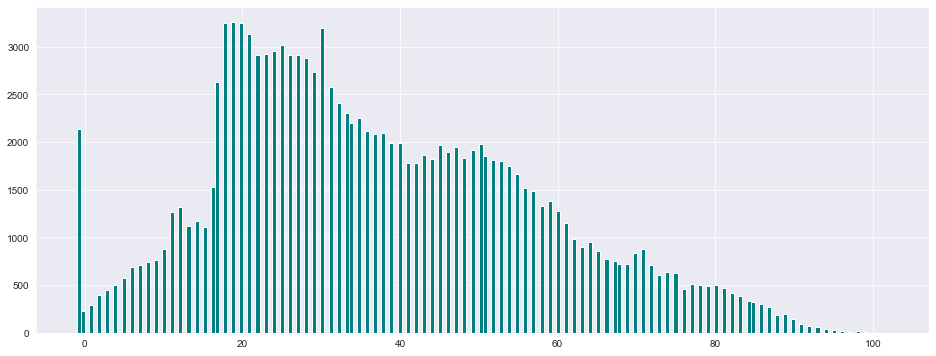

In [41]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.hist(df['Age_of_Casualty'], color ='teal', bins=200)
plt.show()

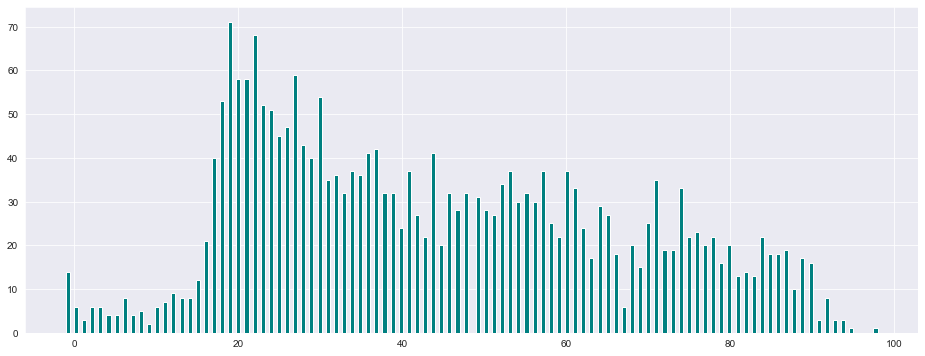

In [42]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.hist(df_fatat['Age_of_Casualty'], color ='teal', bins=200)
plt.show()

### Fatal accidents

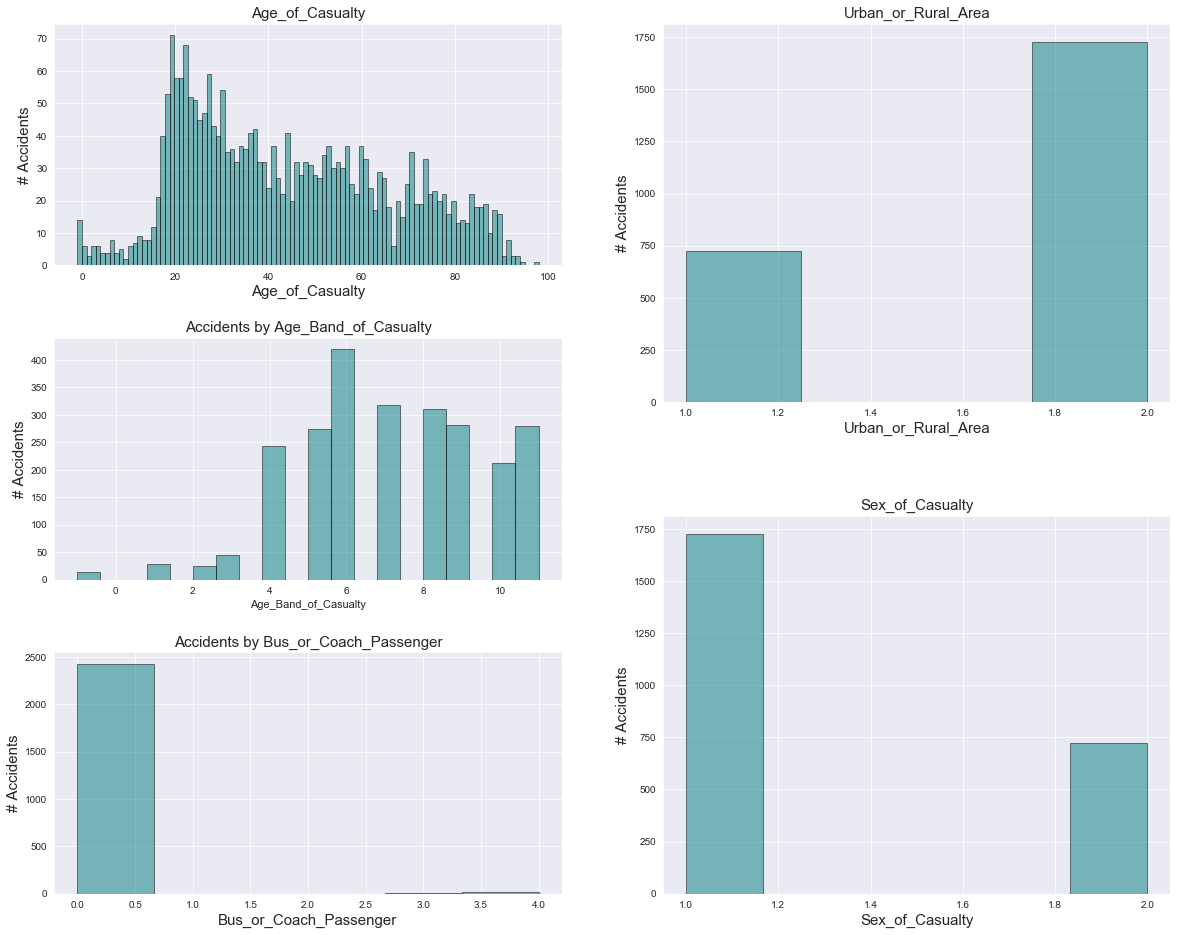

In [43]:
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(df_fatat['Age_of_Casualty'], bins = 100, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Age_of_Casualty', labelpad=3, fontsize = 15)
#ax1.set_xticklabels(['Fatal', 'Serious', 'Slight'], rotation=90)
ax1.set_ylabel('# Accidents',fontsize = 15)
ax1.set_title('Age_of_Casualty',fontsize = 15)

ax2 = fig.add_subplot(323)
ax2.hist(df_fatat['Age_Band_of_Casualty'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Age_Band_of_Casualty',fontsize = 11)
ax2.set_ylabel('# Accidents',fontsize = 15)
ax2.set_title('Accidents by Age_Band_of_Casualty',fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(df_fatat['Bus_or_Coach_Passenger'], bins = 6, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Bus_or_Coach_Passenger',fontsize = 15)
ax3.set_ylabel('# Accidents',fontsize = 15)
ax3.set_title('Accidents by Bus_or_Coach_Passenger',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(df_fatat['Urban_or_Rural_Area'], bins = 4, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Urban_or_Rural_Area',fontsize = 15)
ax4.set_ylabel('# Accidents',fontsize = 15)
ax4.set_title('Urban_or_Rural_Area',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(df_fatat['Sex_of_Casualty'], bins = 6, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Sex_of_Casualty',fontsize = 15)
ax5.set_ylabel('# Accidents',fontsize = 15)
ax5.set_title('Sex_of_Casualty',fontsize = 15)

plt.show()

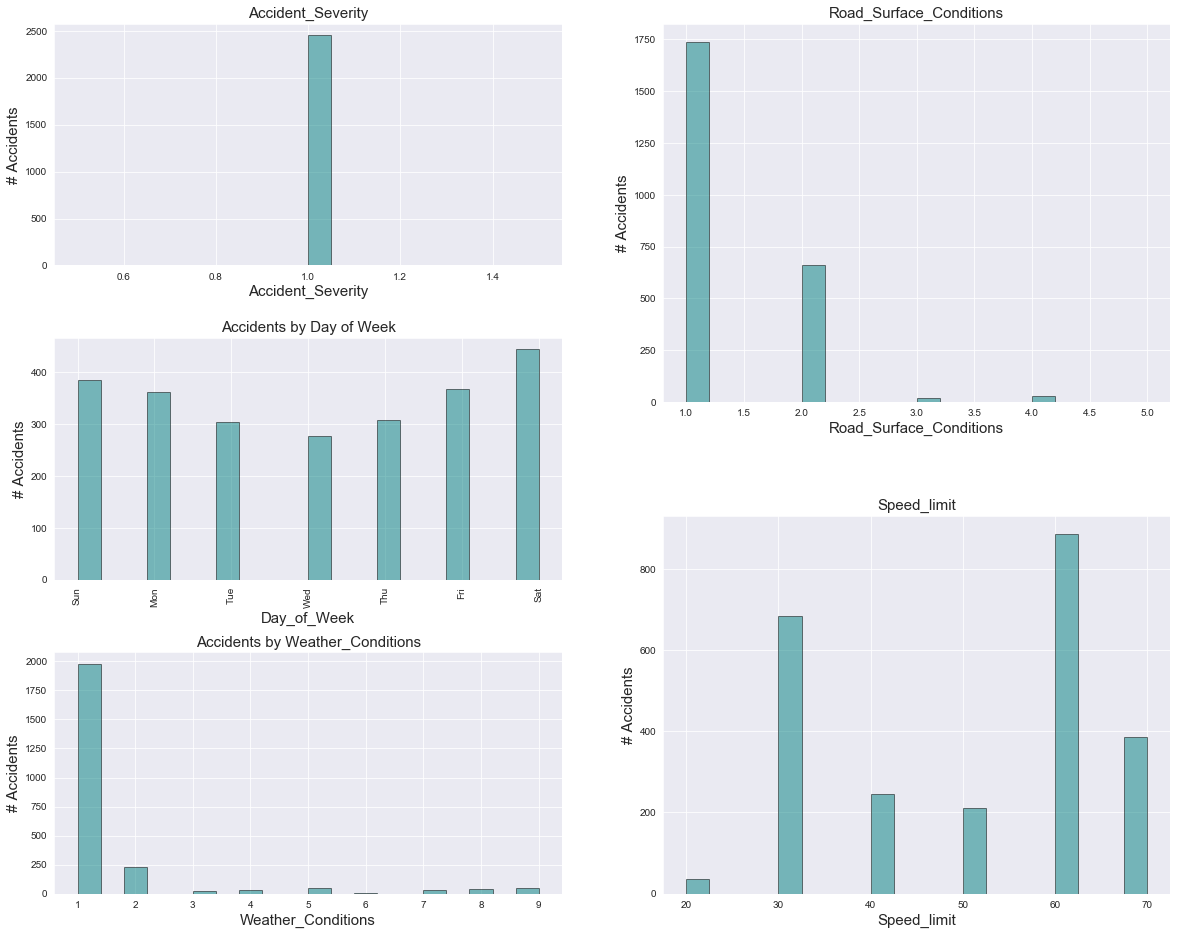

In [44]:
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(df_fatat['Accident_Severity'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Accident_Severity', labelpad=3, fontsize = 15)
#ax1.set_xticklabels(['Fatal', 'Serious', 'Slight'], rotation=90)
ax1.set_ylabel('# Accidents',fontsize = 15)
ax1.set_title('Accident_Severity',fontsize = 15)

ax2 = fig.add_subplot(323)
ax2.hist(df_fatat['Day_of_Week'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Day_of_Week',fontsize = 15)
ax2.set_xticklabels(['Sun', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], rotation=90)
ax2.set_ylabel('# Accidents',fontsize = 15)
ax2.set_title('Accidents by Day of Week',fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(df_fatat['Weather_Conditions'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Weather_Conditions',fontsize = 15)
ax3.set_ylabel('# Accidents',fontsize = 15)
ax3.set_title('Accidents by Weather_Conditions',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(df_fatat['Road_Surface_Conditions'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Road_Surface_Conditions',fontsize = 15)
ax4.set_ylabel('# Accidents',fontsize = 15)
ax4.set_title('Road_Surface_Conditions',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(df_fatat['Speed_limit'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Speed_limit',fontsize = 15)
ax5.set_ylabel('# Accidents',fontsize = 15)
ax5.set_title('Speed_limit',fontsize = 15)

plt.show()

In [45]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger

In [46]:
df['Accident_Severity'].value_counts()

3    102837
2     27213
1      2450
Name: Accident_Severity, dtype: int64

In [47]:
df['Severity_dummy'].value_counts()

0    102837
1     29663
Name: Severity_dummy, dtype: int64

In [59]:
print(f'Share of Females in accidents: {(29663/(102837+29663)*100)}%')
print(f'Share of Females in fatal accidents: {(723/(1727+723)*100)}%')

Share of Females in accidents: 22.387169811320753%
Share of Females in fatal accidents: 29.51020408163265%


In [48]:
df.shape

(132500, 47)

### **Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

In [49]:
print(f'NULL accuraccy: {round((102837/132500*100), 2)}%')

NULL accuraccy: 77.61%


In [60]:
df_fatal['Sex_of_Casualty'].value_counts()

1.0    1727
2.0     723
Name: Sex_of_Casualty, dtype: int64

In [61]:
target = 'Severity_dummy'

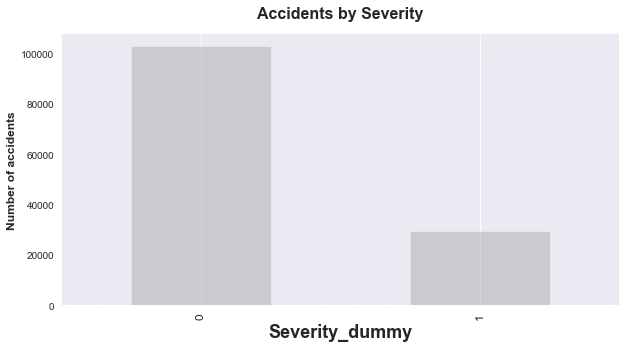

In [62]:
#plt(df['Casualty_Class'].value_counts())
fig, ax = plt.subplots(figsize=(10, 5))
target = 'Severity_dummy'
ax = df.groupby(target)['Number_of_Casualties'].count().plot(kind='bar', color='grey', alpha=0.3);
plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.3)
plt.xlabel(target, fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylabel('Number of accidents', fontsize=12, fontweight='bold')
plt.yticks(fontsize=10)
plt.title(f'Accidents by Severity', pad=15, fontsize=16, fontweight='bold');
#fig.savefig('Average Reviews_per_month by room type.jpg', bbox_inches='tight')

### Modeling

In [64]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [65]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger

#### Rearranging columns 
In the case of larger dataframes where the column titles are dynamic, you can use a list comprehension to select every column not in your target set and then append the target set to the end.

In [67]:
#df = df[[c for c in df.columns if c not in ['Accident_Severity']] + ['Accident_Severity']]

In [68]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Severity_dummy,Accident_Severity
Accident_Index,,,,,,,,,,,,,,,,,,,,,
2018010130027,523810.0,185730.0,-0.215455,51.556878,1,2,1,01/09/2018,7,12:48,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,6.0,0,3
2018010130028,517980.0,185050.0,-0.299739,51.552014,1,1,2,01/09/2018,7,14:00,...,0.0,0.0,0.0,2.0,0.0,11.0,1.0,3.0,0,3
2018010130028,517980.0,185050.0,-0.299739,51.552014,1,1,2,01/09/2018,7,14:00,...,0.0,0.0,0.0,2.0,0.0,11.0,1.0,3.0,0,3
2018010130030,542820.0,182610.0,0.057318,51.524353,1,2,2,01/09/2018,7,11:40,...,0.0,0.0,0.0,0.0,0.0,9.0,1.0,4.0,0,3
2018010130030,542820.0,182610.0,0.057318,51.524353,1,2,2,01/09/2018,7,11:40,...,0.0,0.0,2.0,0.0,0.0,9.0,1.0,4.0,0,3


In [71]:
df.shape

(132500, 47)

In [72]:
labels = ['Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', '1st_Road_Class', '1st_Road_Number', 
                    'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', 
                    '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
                    'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 
                    'Carriageway_Hazards', 'Urban_or_Rural_Area','Vehicle_Reference', 'Casualty_Reference', 
                    'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty', 
                    'Pedestrian_Location', 'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
                    'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type', 'Casualty_Home_Area_Type']

### Principal Component Analysis 

In [73]:
# preprocess the data 
from sklearn.preprocessing import StandardScaler
# Separating out the features and target variables
features = ['Number_of_Vehicles', 'Accident_Severity', 'Number_of_Casualties', 'Day_of_Week', '1st_Road_Class', '1st_Road_Number', 
                    'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', 
                    '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
                    'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 
                    'Carriageway_Hazards', 'Urban_or_Rural_Area','Vehicle_Reference', 'Casualty_Reference', 
                    'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty', 
                    'Pedestrian_Location', 'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
                    'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type', 'Casualty_Home_Area_Type']

x = df[features]
y = df[target]

In [74]:
len(features)

33

In [75]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [76]:
# create principal components 
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2',
                                                                 'principal component 3','principal component 4',
                                                                 'principal component 5',
                                                                 'principal component 6',
                                                                 'principal component 7',
                                                                 'principal component 8',
                                                                 'principal component 9',
                                                                 'principal component 10',
                                                                 'principal component 11',
                                                                 'principal component 12',
                                                                 'principal component 13',
                                                                 'principal component 14',
                                                                 'principal component 15',
                                                                 'principal component 16',
                                                                 'principal component 17',
                                                                 'principal component 18',
                                                                 'principal component 19',
                                                                 'principal component 20',
                                                                 'principal component 21',
                                                                 'principal component 22',
                                                                 'principal component 23',
                                                                 'principal component 24',
                                                                 'principal component 25',
                                                                 'principal component 26',
                                                                 'principal component 27',
                                                                 'principal component 28',
                                                                 'principal component 29',
                                                                 'principal component 30',
                                                                 'principal component 31',
                                                                 'principal component 32',
                                                                 'principal component 33'])

In [77]:
pca.explained_variance_ratio_

array([0.10795133, 0.08970584, 0.06589077, 0.0510273 , 0.0452713 ,
       0.04186678, 0.03848629, 0.03550291, 0.03434574, 0.03312848,
       0.03136448, 0.03033352, 0.03012096, 0.02928835, 0.02906113,
       0.027764  , 0.02681549, 0.02627389, 0.02586968, 0.0250961 ,
       0.02371417, 0.02285293, 0.0224154 , 0.02223829, 0.02175029,
       0.01647279, 0.01466128, 0.00957564, 0.0083493 , 0.00652791,
       0.00330563, 0.00205553, 0.00091654])

### Baseline model (first XGBoost)

In [78]:
# XGBoost model 
# Accuracy: 94.59% for multi class

X = df[labels]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.63%


In [79]:
y_test.shape

(26500,)

Confusion matrix for XGBoost model:
 [[20209   390]
 [ 5274   627]]


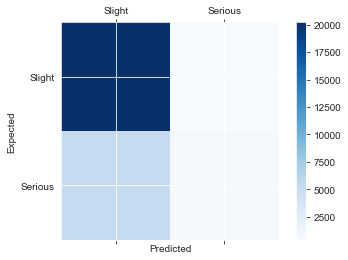

In [80]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix for XGBoost model:\n', conf_mat)

labels1 = ['Slight', 'Serious']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels1)
ax.set_yticklabels([''] + labels1)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Confusion matrix
An interesting way to evaluate the results is by means of a confusion matrix, which shows the correct and incorrect predictions for each class. In the first row, the first column indicates how many "Slight" cases were predicted correctly, and the second row, second column, how many "Serious" cases were predicted as "Serious".

Therefore, the higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

### XGBoost perfomance with just one variable
with highly imbalanced target variable accuracy of the model decrease significanly

In [82]:
model1 = XGBClassifier()
model1.fit(X_train[['Day_of_Week']], y_train)
y_pred1 = model1.predict(X_test[['Day_of_Week']])

accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))

Accuracy: 77.73%


### Logistic regression

In [83]:
from sklearn.linear_model import LogisticRegression
Xl = df[labels]
yl = df[target]
X_trainl, X_testl, y_trainl, y_testl = train_test_split(Xl, yl, test_size=0.2, random_state=1)
logreg = LogisticRegression().fit(X_trainl, y_trainl)
y_predl = logreg.predict(X_testl)
accuracy2 = logreg.score(Xl, yl, sample_weight=None)
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))

Accuracy: 77.66%


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion matrix for LOGISTIC regression:
 [[20583    16]
 [ 5872    29]]


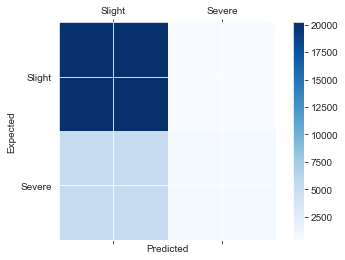

In [84]:
conf_matl = confusion_matrix(y_true=y_testl, y_pred=y_predl)
print('Confusion matrix for LOGISTIC regression:\n', conf_matl)

labelsl = ['Slight', 'Severe']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labelsl)
ax.set_yticklabels([''] + labelsl)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [85]:
from sklearn import metrics
THRESHOLD = 0.0
preds = np.where(logreg.predict(X_testl) > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_testl, preds), metrics.recall_score(y_testl, preds),
                   metrics.precision_score(y_testl, preds), metrics.f1_score(y_testl, preds)], 
             index=["accuracy", "recall", "precision", "F1"])

,0
accuracy,0.777811
recall,0.004914
precision,0.644444
F1,0.009754


In [86]:
import imblearn

In [87]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

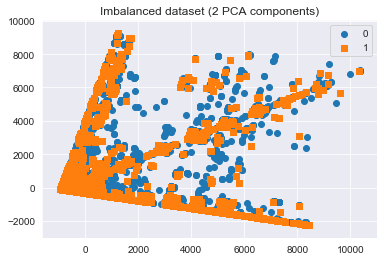

In [88]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

### Random Under Sampling (RUS)

In [89]:
from imblearn.under_sampling import RandomUnderSampler

X = df[labels]
y = df[target]

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)

print(X_rus.shape)
print(y_rus.shape)

(59326, 32)
(59326,)


### XGBoost predictions RUS

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.68%


Confusion matrix for XGBoost modelRUS:
 [[3798 2208]
 [1746 4114]]


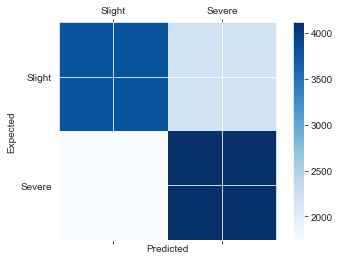

In [91]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix for XGBoost modelRUS:\n', conf_mat)

labels1 = ['Slight', 'Severe']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels1)
ax.set_yticklabels([''] + labels1)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [92]:
THRESHOLD = 0
preds = np.where(model.predict(X_test) > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), metrics.recall_score(y_test, preds),
                   metrics.precision_score(y_test, preds), metrics.f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "F1"])

,0
accuracy,0.666779
recall,0.702048
precision,0.650743
F1,0.675423


### Random Over Sampling (ROS)

In [93]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

print(X_ros.shape)
print(y_ros.shape)

73174 new random picked points
(205674, 32)
(205674,)


### XGBoost predictions ROS

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.81%


Confusion matrix for XGBoost model ROS:
 [[13419  7419]
 [ 6234 14063]]


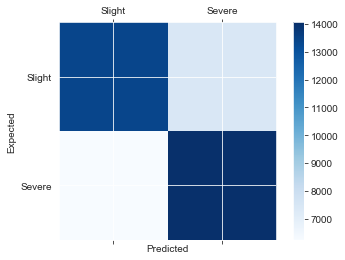

In [95]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix for XGBoost model ROS:\n', conf_mat)

labels1 = ['Slight', 'Severe']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels1)
ax.set_yticklabels([''] + labels1)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [96]:
# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

The simplest metric we can use to evaluate our model is accuracy.

**Classification Accuracy:** Overall, how often is the classifier correct?

We can calculate the accuracy by dividing the number of correct classifications, by the number of observations in the test set. 

### Perfomance metrics

In [97]:
THRESHOLD = 0.0
preds = np.where(model.predict(X_test) > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), metrics.recall_score(y_test, preds),
                   metrics.precision_score(y_test, preds), metrics.f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "F1"])

,0
accuracy,0.668093
recall,0.692861
precision,0.654641
F1,0.673209


### Accuracy

In [98]:
print(round((TP + TN) / float(TP + TN + FP + FN), 4)*100)

66.81


### Precision

In [99]:
from sklearn import metrics
print((TP / float(TP + FP))*100)
print(metrics.precision_score(y_test, y_pred)*100)

65.46410948701238
65.46410948701238


### Recall (Sensitivity)

In [122]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred))

0.6957185791003596
0.6957185791003596


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [123]:
print(TN / float(TN + FP))

0.6420481812074096


### F1 score 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

In [124]:
#calculating the F1 score
2*(metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred))/(metrics.precision_score(y_test, y_pred)+metrics.recall_score(y_test, y_pred))

0.6744036105738234

### Decision Tree Model

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [101]:
# Instantiate and fit a DecisionTreeClassifier
X = df[labels]
y = df[target]
X_ros, y_ros = ros.fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=1)

tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=4) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [102]:
# Feature importance
tree_clf.feature_importances_

array([0.04865101, 0.38387539, 0.        , 0.        , 0.        ,
       0.        , 0.07663963, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.17914424, 0.00625296,
       0.        , 0.        , 0.        , 0.04044647, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0016041 ,
       0.2633862 , 0.        ])

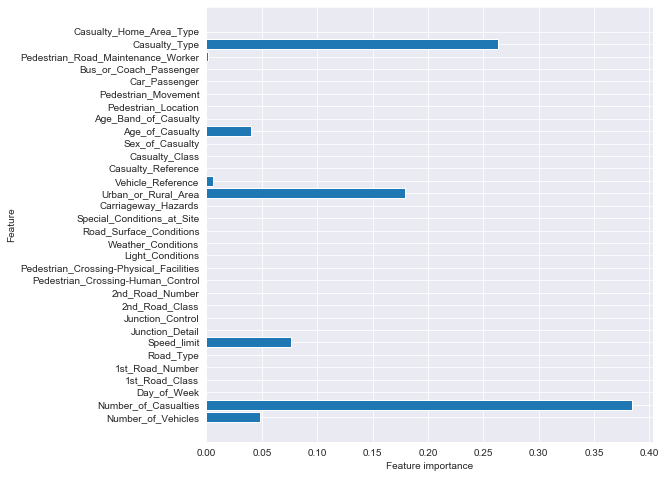

In [103]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [104]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[10752 10086]
 [ 5323 14974]]
              precision    recall  f1-score   support

           0       0.67      0.52      0.58     20838
           1       0.60      0.74      0.66     20297

    accuracy                           0.63     41135
   macro avg       0.63      0.63      0.62     41135
weighted avg       0.63      0.63      0.62     41135



Now, let's check the model's accuracy. Run the cell below to display the test set accuracy of the model.

In [105]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 62.54%


/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


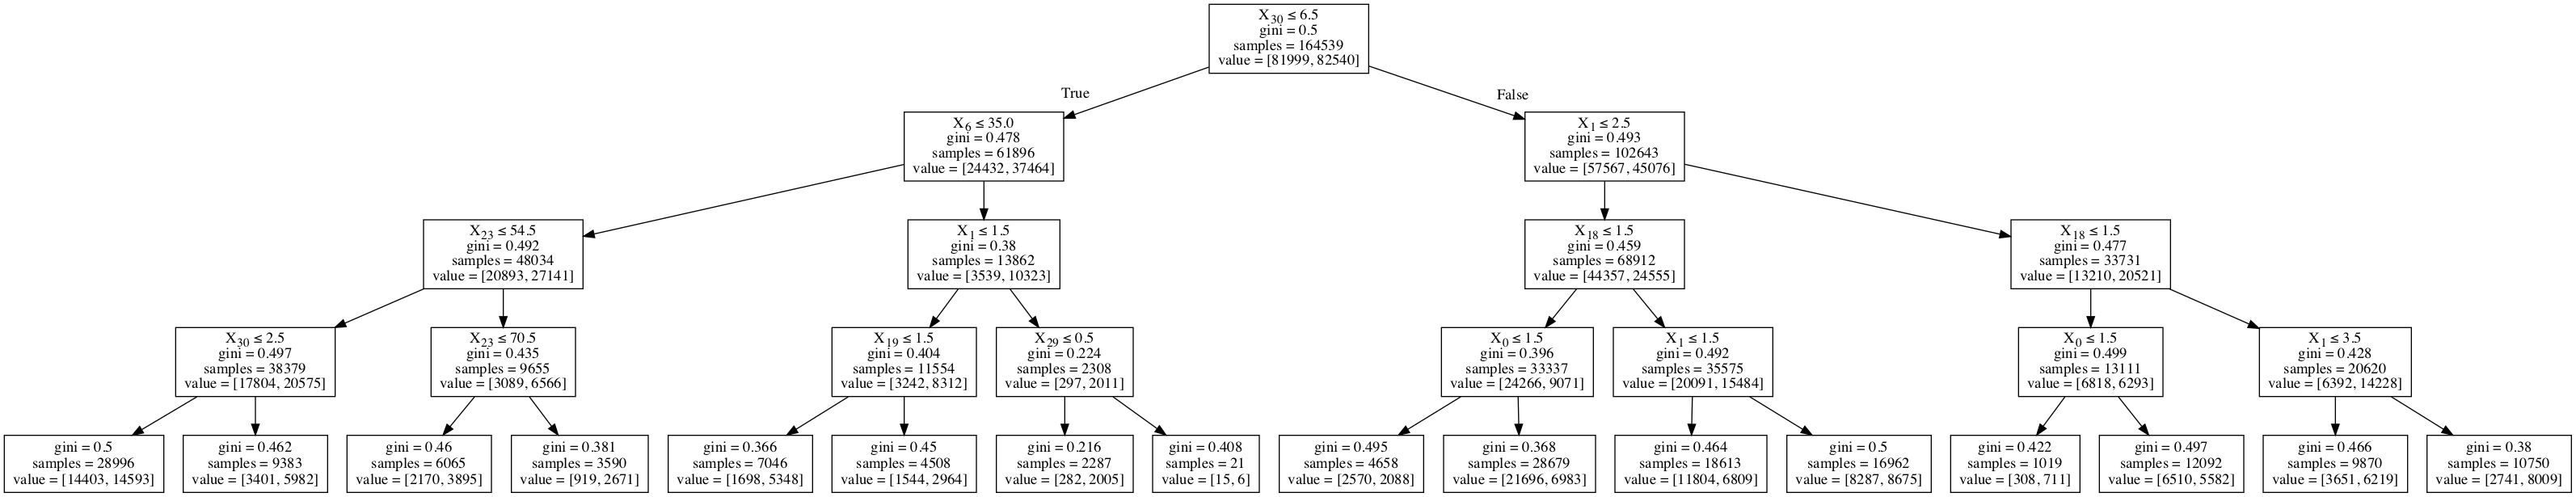

In [106]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# visualizing the regression tree
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In the cell below, instantiate and fit a RandomForestClassifier, and set the number estimators to 100 and the max depth to 5. Then, fit the model to our training data.

In [107]:
X = df[labels]
y = df[target]
X_ros, y_ros = ros.fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=1)

# Instantiate and fit a RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
# Test set predictions
predF = forest.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, predF))
print(classification_report(y_test, predF))

[[13306  7532]
 [ 6643 13654]]
              precision    recall  f1-score   support

           0       0.67      0.64      0.65     20838
           1       0.64      0.67      0.66     20297

    accuracy                           0.66     41135
   macro avg       0.66      0.66      0.66     41135
weighted avg       0.66      0.66      0.66     41135



Now, let's check the training and testing accuracy of the model using its .score() method:

In [109]:
# Training accuracy score
forest.score(X_train, y_train)

0.6525869246804709

In [110]:
# Test accuracy score
forest.score(X_test, y_test)

0.6554029415339735

#### Feature importance

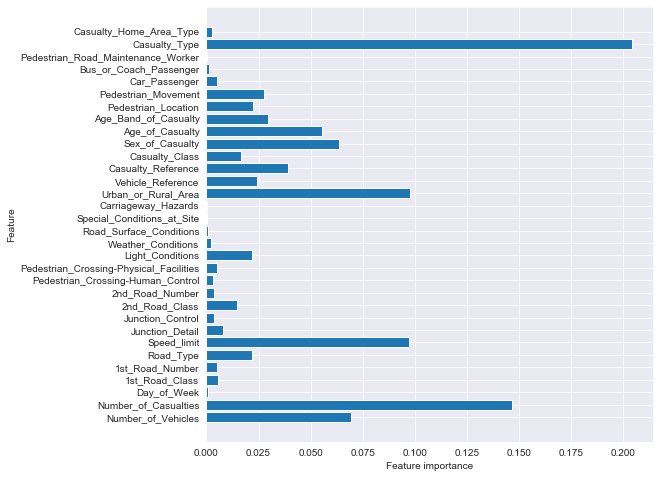

In [111]:
plot_feature_importances(forest)

In [112]:
y_ros.value_counts()

1    102837
0    102837
Name: Severity_dummy, dtype: int64

### Under-sampling: Tomek links
Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In [113]:
from imblearn.under_sampling import TomekLinks

X = df[labels]
y = df[target]

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_sample(X, y)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=1)

forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [115]:
# Test set predictions
predF = forest.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, predF))
print(classification_report(y_test, predF))

[[19077     1]
 [ 5957    18]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     19078
           1       0.95      0.00      0.01      5975

    accuracy                           0.76     25053
   macro avg       0.85      0.50      0.44     25053
weighted avg       0.81      0.76      0.66     25053



### Over-sampling: SMOTE
SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [116]:
from imblearn.over_sampling import SMOTE

X = df[labels]
y = df[target]

smote = SMOTE(sampling_strategy='auto')
X_sm, y_sm = smote.fit_sample(X, y)

#plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [117]:
X_sm.shape

(205674, 32)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1)

forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
# Test set predictions
predF = forest.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, predF))
print(classification_report(y_test, predF))

[[16931  3907]
 [ 5264 15033]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79     20838
           1       0.79      0.74      0.77     20297

    accuracy                           0.78     41135
   macro avg       0.78      0.78      0.78     41135
weighted avg       0.78      0.78      0.78     41135



### SVM

In [120]:
# from sklearn.svm import SVC  

# X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1)

# svclassifier = SVC(kernel='rbf', C=1000)  
# svclassifier.fit(X_train, y_train) 
# y_pred = svclassifier.predict(X_test)

In [121]:
# print(confusion_matrix(y_test,y_pred))  
# print(classification_report(y_test,y_pred)) 
# print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

### XGBoost SMOTE

In [122]:
# XGBoost model 
# Accuracy: 94.59% for multi class

X = df[labels]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1)

model_xg_sm = XGBClassifier()
model_xg_sm.fit(X_train, y_train)
y_pred = model_xg_sm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.12%


Confusion matrix for XGBoost model ROS:
 [[19521  1317]
 [ 5626 14671]]


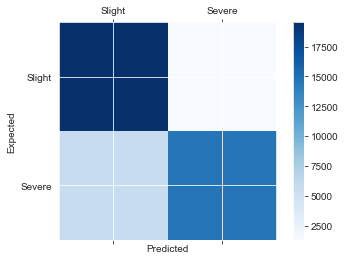

In [123]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix for XGBoost model ROS:\n', conf_mat)

labels1 = ['Slight', 'Severe']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels1)
ax.set_yticklabels([''] + labels1)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [124]:
# Test set predictions
predXG = model_xg_sm.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, predXG))
print(classification_report(y_test, predXG))

[[19521  1317]
 [ 5626 14671]]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85     20838
           1       0.92      0.72      0.81     20297

    accuracy                           0.83     41135
   macro avg       0.85      0.83      0.83     41135
weighted avg       0.85      0.83      0.83     41135



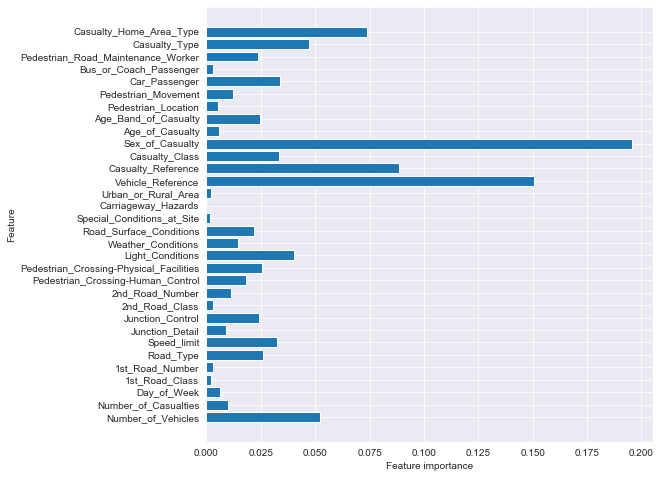

In [125]:
plot_feature_importances(model_xg_sm)

In [126]:
df['Vehicle_Reference'].value_counts()

1.0      72617
2.0      55108
3.0       3867
4.0        650
5.0        155
6.0         49
7.0         20
8.0         12
9.0          9
10.0         5
15.0         2
12.0         1
22.0         1
13.0         1
14.0         1
16.0         1
999.0        1
Name: Vehicle_Reference, dtype: int64

1. you'll see at the bottom of the sheet there's another spreadsheet (yay) that contains a project planning doc. you don't have to, but it would make your project a lot more clear when you're presenting it to us to see if it's viable!
2. remember that this is a CLASSIFICATION project (vs a REGRESSION project) so what you're trying to predict should NOT be a continuous variable. (multiple categories is ok!!!)
3. models we can use (you should test AT LEAST 4):
                - logistic regression
                - k nearest neighbors
                - trees (decision tree, bagged trees, random forest)
                - boosting models (adaboost, gradient boost, xgboost)
                - support vector machines 
                - naive bayes

### Decision Tree Classifier SMOTE

In [128]:
# Instantiate and fit a DecisionTreeClassifier
X = df[labels]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1)

tree_clf_sm = DecisionTreeClassifier(criterion='gini', max_depth=4) 
tree_clf_sm.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

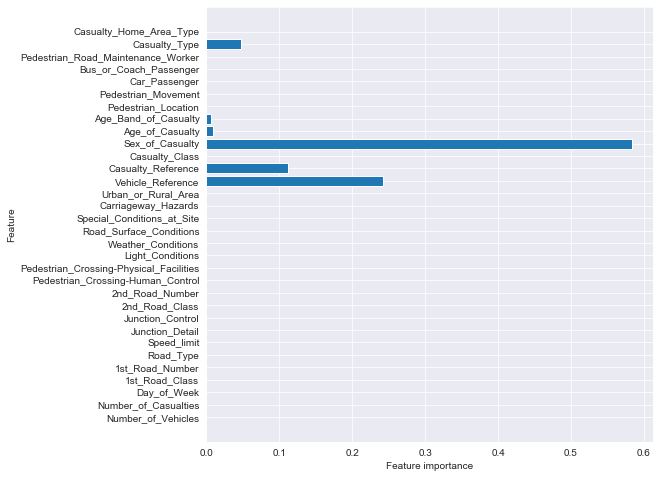

In [129]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf_sm)

In [130]:
# Test set predictions
pred = tree_clf_sm.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[19864   974]
 [10365  9932]]
              precision    recall  f1-score   support

           0       0.66      0.95      0.78     20838
           1       0.91      0.49      0.64     20297

    accuracy                           0.72     41135
   macro avg       0.78      0.72      0.71     41135
weighted avg       0.78      0.72      0.71     41135



### Random Forest SMOTE

In [131]:
X = df[labels]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1)

forest_sm = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest_sm.fit(X_train, y_train)
y_pred = forest_sm.predict(X_test)

Confusion matrix for XGBoost model ROS:
 [[16747  4091]
 [ 5334 14963]]


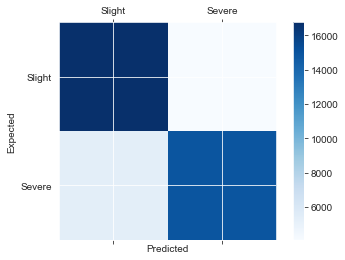

In [132]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix for XGBoost model ROS:\n', conf_mat)

labels1 = ['Slight', 'Severe']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels1)
ax.set_yticklabels([''] + labels1)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [133]:
# Test set predictions
predRF = forest_sm.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

[[16747  4091]
 [ 5334 14963]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78     20838
           1       0.79      0.74      0.76     20297

    accuracy                           0.77     41135
   macro avg       0.77      0.77      0.77     41135
weighted avg       0.77      0.77      0.77     41135



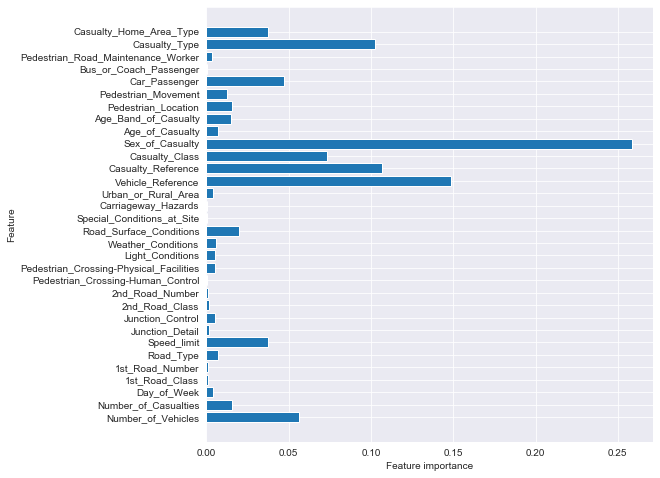

In [134]:
plot_feature_importances(forest_sm)